<a href="https://colab.research.google.com/github/divyanshusharma22/Testline-Project/blob/main/testline_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import requests
import urllib3

In [6]:
# Step 1: Fetch Data from Provided Links
# Quiz Endpoint Data
quiz_endpoint_url = "https://jsonkeeper.com/b/LLQT"


In [10]:
import urllib3
import json

quiz_endpoint_url = "https://jsonkeeper.com/b/LLQT"

http = urllib3.PoolManager(cert_reqs='CERT_NONE')  # Disable SSL verification
response = http.request('GET', quiz_endpoint_url)
quiz_data = json.loads(response.data.decode('utf-8'))
print("Quiz Endpoint Data fetched successfully!")



/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jsonkeeper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Quiz Endpoint Data fetched successfully!


In [11]:
# Quiz Submission Data
quiz_submission_url = "https://api.jsonserve.com/rJvd7g"
response = http.request('GET', quiz_submission_url)
submission_data = json.loads(response.data.decode('utf-8'))
print("Quiz Submission Data fetched successfully!")

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Quiz Submission Data fetched successfully!


In [14]:
from pprint import pprint
pprint(submission_data)


{'accuracy': '80 %',
 'better_than': 24,
 'correct_answers': 8,
 'created_at': '2025-01-17T15:51:29.871+05:30',
 'duration': '15:00',
 'ended_at': '2025-01-17T16:21:28.000+05:30',
 'final_score': '30.0',
 'id': 336566,
 'incorrect_answers': 2,
 'initial_mistake_count': 8,
 'mistakes_corrected': 6,
 'negative_score': '2.0',
 'next_steps': [{'pageType': 'resultPage'}],
 'quiz': {'banner_id': None,
          'coin_count': -1,
          'correct_answer_marks': '4.0',
          'created_at': '2024-07-03T11:00:08.958+05:30',
          'daily_date': 'January 17, 2025',
          'description': '',
          'difficulty_level': None,
          'duration': 128,
          'end_time': '2024-07-04T00:00:00.000+05:30',
          'ends_at': '2025-01-18',
          'exam_id': None,
          'id': 43,
          'is_custom': False,
          'is_form': False,
          'is_published': True,
          'live_count': 'Free Test',
          'lives': None,
          'lock_solutions': False,
          'max_

In [12]:
# Historical Quiz Data
historical_data_url = "https://api.jsonserve.com/XgAgFJ"
response = http.request('GET', historical_data_url)
historical_data = json.loads(response.data.decode('utf-8'))
print("Historical Quiz Data fetched successfully!")


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Historical Quiz Data fetched successfully!


In [15]:
# Process Quiz Data
questions = quiz_data['quiz']['questions']
questions_df = pd.DataFrame(questions)

# Flatten Submission Data
submission_flat = pd.json_normalize(submission_data)
print("Flattened Submission DataFrame:")
print(submission_flat.head())

Flattened Submission DataFrame:
       id  quiz_id                       user_id  \
0  336566       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   

                    submitted_at                     created_at  \
0  2025-01-17T15:51:29.859+05:30  2025-01-17T15:51:29.871+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:51:29.871+05:30     32             2     80 %   100  ...   

  quiz.exam_id quiz.show_unanswered  quiz.ends_at  quiz.lives quiz.live_count  \
0         None                False    2025-01-18        None       Free Test   

  quiz.coin_count quiz.questions_count   quiz.daily_date  \
0              -1                  128  January 17, 2025   

  quiz.max_mistake_count  quiz.reading_materials  
0                     15                      []  

[1 rows x 68 columns]


In [16]:
# Process Response Map
response_map = submission_data['response_map']
response_map_df = pd.DataFrame(list(response_map.items()), columns=['question_id', 'selected_option_id'])


In [17]:
# Add Metadata to Response Map
response_map_df['quiz_id'] = submission_data['quiz_id']
response_map_df['user_id'] = submission_data['user_id']
print("Processed Response Map:")
print(response_map_df.head())

Processed Response Map:
  question_id  selected_option_id  quiz_id                       user_id
0        1837                7363       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2
1        1848                7407       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2
2        1852                7423       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2
3        1862                7464       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2
4        1877                7525       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2


In [21]:
# Historical Data
historical_df = pd.DataFrame(historical_data)
print(response_map_df.dtypes)
print(questions_df.dtypes)



question_id           object
selected_option_id     int64
quiz_id                int64
user_id               object
dtype: object
id                      int64
description            object
difficulty_level       object
topic                  object
is_published             bool
created_at             object
updated_at             object
detailed_solution      object
type                   object
is_mandatory             bool
show_in_feed             bool
pyq_label              object
topic_id                int64
reading_material_id     int64
fixed_at               object
fix_summary            object
created_by             object
updated_by             object
quiz_level             object
question_from          object
language               object
photo_url              object
photo_solution_url     object
is_saved                 bool
tag                    object
options                object
dtype: object


In [22]:
# Convert question_id in response_map_df to int64
response_map_df['question_id'] = response_map_df['question_id'].astype(int)

# Merge the response_map_df with questions_df
merged_df = pd.merge(response_map_df, questions_df, left_on='question_id', right_on='id', how='inner')

# Preview the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())


Merged DataFrame:
   question_id  selected_option_id  quiz_id                       user_id  \
0         1837                7363       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   
1         1848                7407       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   
2         1852                7423       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   
3         1862                7464       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   
4         1877                7525       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   

     id                                        description difficulty_level  \
0  1837  Which of the following statement(s) regarding ...             None   
1  1848  Which of the following types of connective tis...             None   
2  1852                 Choose the correctly matched pair.             None   
3  1862  The secretions of endocrine glands are release...             None   
4  1877                                    Frog's heart is             None   

                                 topic  is_p

In [26]:
# Extract the correct option ID from the `options` column
merged_df['correct_option_id'] = merged_df['options'].apply(
    lambda x: next((o['id'] for o in x if o.get('is_correct')), None)
)

# Add a column to indicate if the user's answer was correct
merged_df['is_correct'] = merged_df['selected_option_id'] == merged_df['correct_option_id']

# Preview the updated DataFrame
print("Updated DataFrame with Correctness:")
print(merged_df[['question_id', 'selected_option_id', 'correct_option_id', 'is_correct']].head())


Updated DataFrame with Correctness:
   question_id  selected_option_id  correct_option_id  is_correct
0         1837                7363               7363        True
1         1848                7407               7407        True
2         1852                7423               7423        True
3         1862                7464               7462       False
4         1877                7525               7525        True


In [31]:
# Calculate Overall Accuracy
overall_accuracy = merged_df['is_correct'].mean() * 100
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")




Overall Accuracy: 80.00%


In [32]:
# Filter Incorrect Questions
incorrect_questions = merged_df[~merged_df['is_correct']]

# Display Incorrectly Answered Questions
print("\nIncorrectly Answered Questions:")
print(incorrect_questions[['question_id', 'description', 'correct_option_id', 'selected_option_id']])




Incorrectly Answered Questions:
   question_id                                        description  \
3         1862  The secretions of endocrine glands are release...   
5         1878  Vasa efferentia in male frog, enter the kidney...   

   correct_option_id  selected_option_id  
3               7462                7464  
5               7526                7529  


In [33]:
# Generate Recommendations for Incorrect Questions
recommendations = []
for _, row in incorrect_questions.iterrows():
    recommendations.append(
        f"Revise the question: '{row['description']}' (Correct Option: {row['correct_option_id']})"
    )

if recommendations:
    print("\nRecommendations:")
    print("\n".join(recommendations))
else:
    print("\nGreat job! You answered all questions correctly.")



Recommendations:
Revise the question: 'The secretions of endocrine glands are released directly' (Correct Option: 7462)
Revise the question: 'Vasa efferentia in male frog, enter the kidney and open into' (Correct Option: 7526)


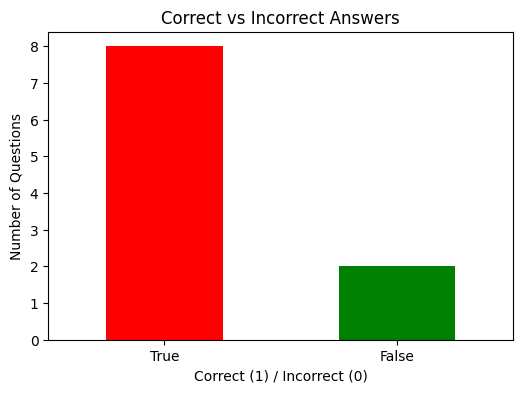

In [34]:
import matplotlib.pyplot as plt

# Plot Correct vs Incorrect Answers
answer_summary = merged_df['is_correct'].value_counts()
plt.figure(figsize=(6, 4))
answer_summary.plot(kind='bar', color=['red', 'green'], rot=0)
plt.title("Correct vs Incorrect Answers")
plt.xlabel("Correct (1) / Incorrect (0)")
plt.ylabel("Number of Questions")
plt.show()



In [35]:
# Save Incorrectly Answered Questions
incorrect_questions.to_csv("incorrect_questions.csv", index=False)

# Download the file
from google.colab import files
files.download("incorrect_questions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>